# Final Project - Checkpoint 1

Import data CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Raw data dari GitHub
df1=pd.read_csv('dataset/jakarta-air-quality.csv')
df1 #DataFrame Output

,date,pm25,pm10
0,2023/8/1,102,55
1,2023/8/2,130,65
2,2023/8/3,135,68
3,2023/8/4,136,60
4,2023/8/5,125,91
...,...,...,...
2021,2015/9/15,,104
2022,2015/9/16,,81
2023,2015/9/17,,93
2024,2015/9/18,,86


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2026 non-null   object
 1    pm25   2026 non-null   object
 2    pm10   2026 non-null   object
dtypes: object(3)
memory usage: 47.6+ KB


In [5]:
#Import Raw data dari GitHub
df2=pd.read_csv('dataset/rthbaru.csv')
df2 #DataFrame Output

,tahun,provinsi,kota/kabupaten,luas wilayah (km2),luas wilayah rth (km2),%rth(b/a)
0,2020,DKI Jakarta,Kota Adm. Jakarta Utara,140.00,337.36,2.41
1,2020,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.05,0.04
2,2020,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,0.12,1.33
3,2020,DKI Jakarta,Kota Adm. Jakarta Selatan,154.30,0.00,0.00
4,2020,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.83,1.73
5,2020,DKI Jakarta,Kota Adm. Jakarta Timur,182.70,350.68,1.92
6,2021,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.02,0.02
7,2021,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,289.87,33.32
8,2021,DKI Jakarta,Kota Adm. Jakarta Selatan,141.27,175.30,1.24
9,2021,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.84,1.74


In [6]:
df1.describe() #Fungsi pandas untuk menampilkan summary statistical

,date,pm25,pm10
count,2026,2026,2026
unique,2026,167,106
top,2023/8/1,,
freq,1,714,567


In [7]:
df1.columns #Melakukan pengecekan terhadap kolom dan type datanya

Index(['date', ' pm25', ' pm10'], dtype='object')

In [8]:
df_fix = df1.copy()

In [9]:
df_fix.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

##konversi kolom date menjadi datetime

In [10]:
df_fix['date'] = pd.to_datetime(df_fix['date'])
df_fix['pm25'] = df_fix[' pm25'].str.strip()
df_fix['pm10'] = df_fix[' pm10'].str.strip()

In [11]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2026 non-null   datetime64[ns]
 1    pm25   2026 non-null   object        
 2    pm10   2026 non-null   object        
 3   pm25    2026 non-null   object        
 4   pm10    2026 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 79.3+ KB


In [12]:
df_fix.drop(columns = [' pm25', ' pm10'], axis =1, inplace = True)
df_fix.head(10)

,date,pm25,pm10
0,2023-08-01,102,55
1,2023-08-02,130,65
2,2023-08-03,135,68
3,2023-08-04,136,60
4,2023-08-05,125,91
5,2023-08-06,144,81
6,2023-08-07,159,69
7,2023-08-08,157,66
8,2023-08-09,151,67
9,2023-08-10,156,67


In [13]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2026 non-null   datetime64[ns]
 1   pm25    2026 non-null   object        
 2   pm10    2026 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 47.6+ KB


##Ganti kolom kosong menjadi nan/null

In [14]:
df_fix[df_fix['pm10']=='']

,date,pm25,pm10
10,2023-08-11,169,
11,2023-07-01,127,
12,2023-07-02,115,
13,2023-07-03,129,
14,2023-07-04,116,
...,...,...,...
1211,2018-07-12,129,
1212,2018-07-13,130,
1213,2018-07-14,149,
1214,2018-07-15,88,


In [15]:
df_fix[df_fix['pm25']=='']

,date,pm25,pm10
1312,2022-06-01,,38
1313,2022-01-03,,35
1314,2022-01-04,,39
1315,2022-01-05,,68
1316,2022-01-06,,52
...,...,...,...
2021,2015-09-15,,104
2022,2015-09-16,,81
2023,2015-09-17,,93
2024,2015-09-18,,86


In [16]:
df_fix.replace('', np.nan, inplace=True)

In [17]:
df_fix

,date,pm25,pm10
0,2023-08-01,102,55
1,2023-08-02,130,65
2,2023-08-03,135,68
3,2023-08-04,136,60
4,2023-08-05,125,91
...,...,...,...
2021,2015-09-15,NaN,104
2022,2015-09-16,NaN,81
2023,2015-09-17,NaN,93
2024,2015-09-18,NaN,86


##konversi pm25 dan pm10 ke numeric(float)

In [18]:
df_fix[['pm25','pm10']] = df_fix[['pm25','pm10']].astype(float)

In [19]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2026 non-null   datetime64[ns]
 1   pm25    1312 non-null   float64       
 2   pm10    1459 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 47.6 KB


In [20]:
df_fix.describe()

,pm25,pm10
count,1312.000000,1459.000000
mean,88.849085,49.177519
std,40.908058,19.940120
min,1.000000,1.000000
25%,58.000000,35.000000
50%,97.000000,50.000000
75%,122.000000,62.000000
max,222.000000,250.000000


In [21]:
df_fix.isna().sum()

date      0
pm25    714
pm10    567
dtype: int64

In [22]:
df_fix['pm25'].fillna(df_fix['pm25'].median(), inplace = True)
df_fix['pm10'].fillna(df_fix['pm10'].median(), inplace = True)

In [23]:
df_fix.isna().sum()

date    0
pm25    0
pm10    0
dtype: int64

In [24]:
df_fix.sort_values('date')

,date,pm25,pm10
1979,2015-07-16,97.0,62.0
1980,2015-07-17,97.0,63.0
1981,2015-07-18,97.0,60.0
1982,2015-07-19,97.0,60.0
1983,2015-07-20,97.0,59.0
...,...,...,...
6,2023-08-07,159.0,69.0
7,2023-08-08,157.0,66.0
8,2023-08-09,151.0,67.0
9,2023-08-10,156.0,67.0


## Memisahkan Kolom date

In [25]:
df_split = df_fix
df_split

,date,pm25,pm10
0,2023-08-01,102.0,55.0
1,2023-08-02,130.0,65.0
2,2023-08-03,135.0,68.0
3,2023-08-04,136.0,60.0
4,2023-08-05,125.0,91.0
...,...,...,...
2021,2015-09-15,97.0,104.0
2022,2015-09-16,97.0,81.0
2023,2015-09-17,97.0,93.0
2024,2015-09-18,97.0,86.0


In [26]:
df_split['date'] = pd.to_datetime(df_split['date']) #Konversi Datetime
df_split

,date,pm25,pm10
0,2023-08-01,102.0,55.0
1,2023-08-02,130.0,65.0
2,2023-08-03,135.0,68.0
3,2023-08-04,136.0,60.0
4,2023-08-05,125.0,91.0
...,...,...,...
2021,2015-09-15,97.0,104.0
2022,2015-09-16,97.0,81.0
2023,2015-09-17,97.0,93.0
2024,2015-09-18,97.0,86.0


In [27]:
#Pisahkan Kolom menjadi Tahun - Bulan - Tanggal dalam kolom terpisah
df_split['year'] = df_split['date'].dt.year
df_split['month'] = df_split['date'].dt.month
df_split['day'] = df_split['date'].dt.day
df_split

,date,pm25,pm10,year,month,day
0,2023-08-01,102.0,55.0,2023,8,1
1,2023-08-02,130.0,65.0,2023,8,2
2,2023-08-03,135.0,68.0,2023,8,3
3,2023-08-04,136.0,60.0,2023,8,4
4,2023-08-05,125.0,91.0,2023,8,5
...,...,...,...,...,...,...
2021,2015-09-15,97.0,104.0,2015,9,15
2022,2015-09-16,97.0,81.0,2015,9,16
2023,2015-09-17,97.0,93.0,2015,9,17
2024,2015-09-18,97.0,86.0,2015,9,18


In [28]:
df_split
df_airquality=df_split #Existing Data
df_airquality.to_csv('Tren_Historis_air_quality_pertahun.csv', index=False)

##EDA (Exploratory Data Analysis)

STATISTIKA DESKRIPTIF

Statisika Deskriptif meliputi nilai rata-rata (mean), median, modus, deviasi standar, kuartil, rentang, dan sebagainya. Statistik ini membantu memberikan gambaran umum tentang distribusi data. Kali ini akan dianalisis mengenai variabel pm2.5 dan pm10 yang digunakan

Exploratory Data Analysis. Ini adalah proses dalam analisis data yang bertujuan untuk menjelajahi dan memahami struktur, pola, serta karakteristik dari data yang tersedia. Data yang digunakan meliputi variabel Particulate Matter. Particulate Matter (PM) adalah partikel udara. Variabel yang terdapat pada data yaitu PM2.5 dan PM10. Particulate Matter (PM2.5 dan PM10) adalah partikel udara yang berukuran lebih kecil dari atau sama dengan 2.5 dan 10 µm (mikrometer). Dari semua tindakan polusi udara, PM2.5 merupakan ancaman kesehatan terbesar. 1 Karena ukurannya yang kecil, PM2.5 dapat tetap melayang di udara untuk waktu yang lama dan dapat diserap jauh ke dalam aliran darah saat terhirup.

Beberapa sumber PM2.5 buatan manusia yang paling umum: pembakaran motor
- pembakaran pembangkit listrik
- proses industri
- kompor, perapian, dan pembakaran kayu rumah
- asap dari kembang api
- merokok

Sumber alami PM2.5 dapat meliputi:
- debu
- jelaga
- kotoran
- garam tertiup angin
- spora tumbuhan
- serbuk sari
- asap dari kebakaran hutan

Refrensi : https://www.iqair.com/id/newsroom/pm2-5

In [29]:
df_fix.describe()

,pm25,pm10,year,month,day
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,91.721619,49.407700,2019.935834,6.515795,15.642152
std,33.144927,16.923783,2.142072,3.448814,8.813557
min,1.000000,1.000000,2015.000000,1.000000,1.000000
25%,81.000000,41.000000,2018.000000,3.000000,8.000000
50%,97.000000,50.000000,2020.000000,7.000000,16.000000
75%,108.000000,57.000000,2022.000000,9.000000,23.000000
max,222.000000,250.000000,2023.000000,12.000000,31.000000


###Distribution Plot

Text(0.5, 1.0, 'Distribution of pm10')

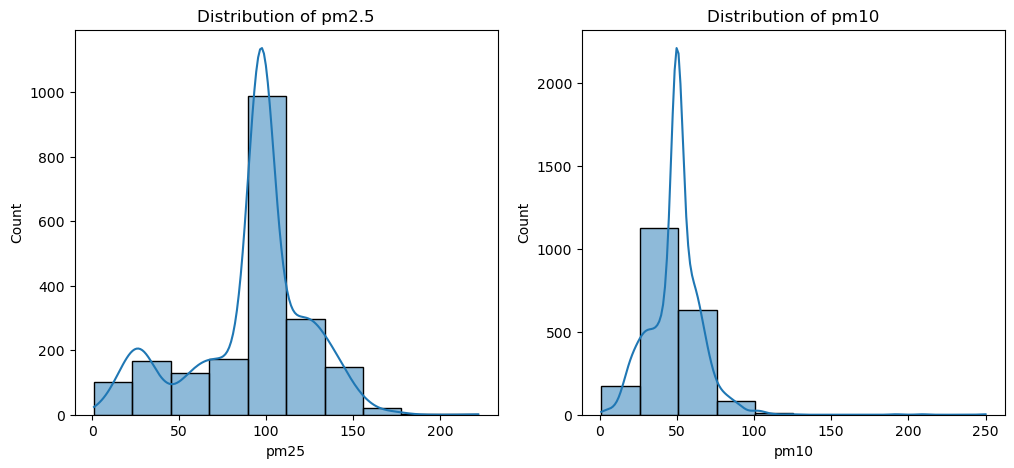

In [30]:
#Membuat Displot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_fix['pm25'], bins=10, kde=True)
plt.title('Distribution of pm2.5')

plt.subplot(1, 2, 2)
sns.histplot(df_fix['pm10'], bins=10, kde=True)
plt.title('Distribution of pm10')

Dari grafik diatas menunjukan right skewness yang menandakan bahwa nilai mediannya lebih tinggi dari meannya.

Dari grafik diatas menunjukan distribusi positive skewness. Distibusi ini berarti  kondisi data memiliki ekor yang lebih panjang di sebelah kanan daripada di sebelah kiri.

Dalam hal ini, nilai rata-rata lebih besar dari nilai median, yang menunjukkan bahwa ada beberapa nilai yang sangat tinggi yang menyebabkan distribusi data tersebut tidak simetris.

In [31]:
#Nilai Mean Tahunan
df_year_mean1=df_split.groupby(['year'])['pm10'].mean().reset_index()
df_year_mean2=df_split.groupby(['year'])['pm25'].mean().reset_index()

In [32]:
df_year_mean1

,year,pm10
0,2015,77.971831
1,2016,56.620000
2,2017,40.425743
3,2018,53.889706
4,2019,55.759091
5,2020,43.117318
6,2021,43.300595
7,2022,48.405172
8,2023,50.290909


In [33]:
df_year_mean1.mean()

year    2019.000000
pm10      52.197818
dtype: float64

###Mean Yearly PM 10

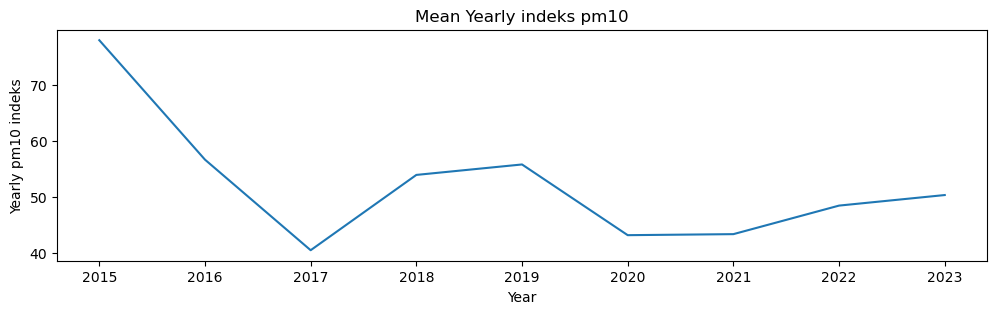

In [34]:
#Mean Grafik
plt.figure(figsize=(12,3))
plt.title("Mean Yearly indeks pm10")
plt.xlabel("Year")
plt.ylabel("Yearly pm10 indeks")
plt.plot(df_year_mean1['year'],df_year_mean1['pm10'])#plot Mean Chart
plt.show()#Display

dari grafik tersebut kenaikan level polusi mengalami trend sideways.
apabila dilihat dari mean tahunannya di angka 52 ternyata penurunan dari 2015-2023 masih diatas rata-rata kenaikan tahunannya.


level kenaikan polusi di tahun 2015-2023 telah turun jauh semenjak tahun 2015.
Mungkin saja penurunan tingkat indeks polusi signifikan dari tahun 2015 - sekarang terjadi karena adanya penangan yang sangat baik dari sisi sektoral ditiap daerahnya.

In [35]:
df_year_mean2

,year,pm25
0,2015,97.000000
1,2016,97.000000
2,2017,97.000000
3,2018,109.154412
4,2019,104.704545
5,2020,96.756983
6,2021,44.315476
7,2022,103.962644
8,2023,95.504545


In [36]:
df_year_mean2.describe()

,year,pm25
count,9.000000,9.000000
mean,2019.000000,93.933178
std,2.738613,19.199200
min,2015.000000,44.315476
25%,2017.000000,96.756983
50%,2019.000000,97.000000
75%,2021.000000,103.962644
max,2023.000000,109.154412


In [37]:
df_mean=df_year_mean2 #Existing Data
df_mean.to_csv('Mean_PM25 pertahun.csv', index=False)

In [38]:
df_year_mean2.mean()

year    2019.000000
pm25      93.933178
dtype: float64

### Mean Yearly PM 2.5

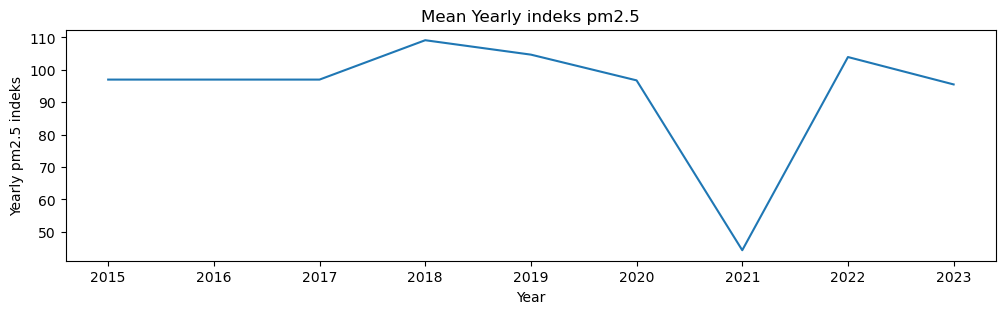

In [39]:
#Mean Grafik
plt.figure(figsize=(12,3))
plt.title("Mean Yearly indeks pm2.5")
plt.xlabel("Year")
plt.ylabel("Yearly pm2.5 indeks")
plt.plot(df_year_mean2['year'],df_year_mean2['pm25'])#plot Mean Chart
plt.show()#Display

Dapat dilihat pada grafik di atas bahwa nilai rata-rata tahunan paling besar di tahun 2018 dengan nilai 109.15 sedangkan nilai rata-rata tahunan paling kecil di tahun 2021 dengan nilai 44.31.

Dari data indeks pm2.5 menunjukan angka 93.93  pada tahun 2015-2023 Yang menandakan nilainya itu di rentang tidak sehat untuk kesehatan manusia.

terjadi tren penurunan rata - rata indeks pm2.5 di Jakarta secara signifikan pada tahun 2021 dari tahun sebelumnya senilai 44.31. jika dilihat pada tabel rujukan, nilai tersebut masih masuk ke dalam rentang 'moderate'.

Sedangkan pada tahun 2022 terjadi tren penaikan rata - rata indeks pm 2.5 di Jakarta secara signifikan dari tahun sebelumnya senilai 103.96. jika dilihat pada tabel rujukan, nilai tersebut masuk ke dalam rentang 'unhealthy'.

##Korelasi PM 2.5 dengan RTH

###Merge tabel pm2.5 dan RTH

In [40]:
df2

,tahun,provinsi,kota/kabupaten,luas wilayah (km2),luas wilayah rth (km2),%rth(b/a)
0,2020,DKI Jakarta,Kota Adm. Jakarta Utara,140.00,337.36,2.41
1,2020,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.05,0.04
2,2020,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,0.12,1.33
3,2020,DKI Jakarta,Kota Adm. Jakarta Selatan,154.30,0.00,0.00
4,2020,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.83,1.73
5,2020,DKI Jakarta,Kota Adm. Jakarta Timur,182.70,350.68,1.92
6,2021,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.02,0.02
7,2021,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,289.87,33.32
8,2021,DKI Jakarta,Kota Adm. Jakarta Selatan,141.27,175.30,1.24
9,2021,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.84,1.74


In [41]:
df2 = df2.rename(columns={'tahun': 'year'}) #Mengubah nama kolom dengan indeks
df2 = df2.rename(columns={'luas wilayah (km2)': 'luas'})
df2 = df2.rename(columns={'luas wilayah rth (km2)': 'rth'})
df2.head() #Tampilkan kembali data CSV diatas

,year,provinsi,kota/kabupaten,luas,rth,%rth(b/a)
0,2020,DKI Jakarta,Kota Adm. Jakarta Utara,140.00,337.36,2.41
1,2020,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.05,0.04
2,2020,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,0.12,1.33
3,2020,DKI Jakarta,Kota Adm. Jakarta Selatan,154.30,0.00,0.00
4,2020,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.83,1.73


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            18 non-null     int64  
 1   provinsi        18 non-null     object 
 2   kota/kabupaten  18 non-null     object 
 3   luas            18 non-null     float64
 4   rth             18 non-null     float64
 5   %rth(b/a)       18 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 996.0+ bytes


In [43]:
df_rth=df2
df_rth.head()

,year,provinsi,kota/kabupaten,luas,rth,%rth(b/a)
0,2020,DKI Jakarta,Kota Adm. Jakarta Utara,140.00,337.36,2.41
1,2020,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.05,0.04
2,2020,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,0.12,1.33
3,2020,DKI Jakarta,Kota Adm. Jakarta Selatan,154.30,0.00,0.00
4,2020,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.83,1.73


In [44]:
df_rth.describe()

,year,luas,rth,%rth(b/a)
count,18.000000,18.000000,18.000000,18.000000
mean,2021.000000,108.257222,107.235000,4.611667
std,0.840168,61.982045,145.553076,10.494841
min,2020.000000,8.700000,0.000000,0.000000
25%,2020.000000,48.130000,0.067500,0.047500
50%,2021.000000,132.200000,0.835000,1.285000
75%,2022.000000,141.270000,261.227500,1.875000
max,2022.000000,182.700000,350.680000,33.410000


In [45]:
#Mean Tahunan
df_rth=df_rth.groupby(['year'])['rth'].mean().reset_index()

##Mean Yearly RTH

In [46]:
df_rth

,year,rth
0,2020,114.840000
1,2021,103.663333
2,2022,103.201667


In [47]:
df_rth=df_year_mean2.merge(df_rth, on=['year'])
df_rth.head()

,year,pm25,rth
0,2020,96.756983,114.840000
1,2021,44.315476,103.663333
2,2022,103.962644,103.201667


###Korelasi

In [48]:
df_rth.corr()

,year,pm25,rth
year,1.000000,0.110662,-0.883007
pm25,0.110662,1.000000,0.368761
rth,-0.883007,0.368761,1.000000


In [49]:
df_cor=df_year_mean2 #Existing Data
df_cor.to_csv('Mean_PM25 pertahun.csv', index=False)

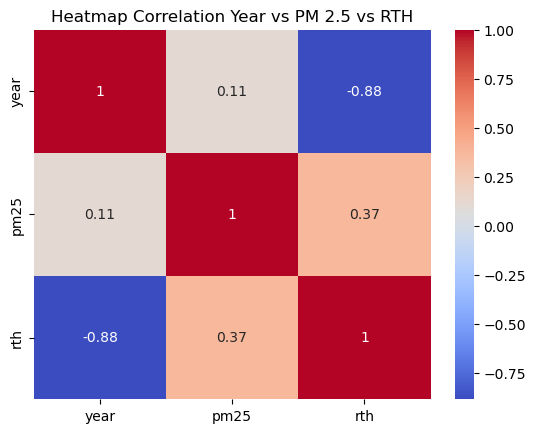

<Figure size 800x600 with 0 Axes>

In [50]:
plt.title('Heatmap Correlation Year vs PM 2.5 vs RTH')
correlation_matrix = df_rth.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(8, 6))
plt.show()
correlation_matrix.to_csv('hasil_korelasi.csv', index=False)

Tabel Korelasi

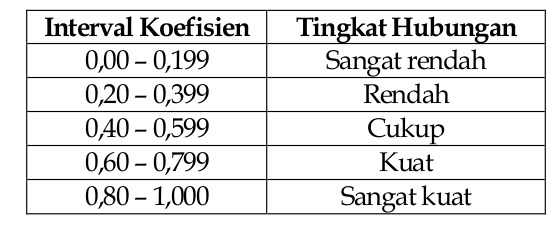

Dalam output matriks korelasi di atas, ternyata nilai koefisien korelasi variable Tahun dengan RTH (Ruang Terbuka Hijau) mendapatkan nilai -0.88. Jika dilihat dalam tabel koefisien korelasi, angka tersebut masuk ke dalam rentang 'Sangat Kuat'. Tetapi nilai yang didapatkan bernilai minus(-) yang artinya semakin tinggi tahun, semakin kecil nilai Ruang Terbuka Hijau tetapi tidak menunjukan kausalitas atau hubungan sebab akibat. lalu pada nilai koefisien korelasi variabel tahun dengan PM2.5 menunjukkan angka 0.11. Jika dilihat pada nilai tabel koefisien korelasi, nilai tersebut masuk ke dalam rentang "Sangat Rendah"
lalu pada nilai koefisien korelasi variabel PM2.5 dan Ruang Terbuka Hijau (RTH) menunjukkan angka 0.37. Jika dilihat pada nilai tabel koefisien korelasi, nilai tersebut masuk ke dalam rentang "Rendah"

Ruang Terbuka Hijau (RTH) memiliki pengaruh terhadap konsentrasi PM2.5. Diambil dari jurnal e – proceeding of Enginering penelitian yang dilakukan oleh Syarifah Rahmadani, Indra Chandra, dan Rahmat Awaludin pada tahun 2021 yang berjudul “PENGARUH RUANG TERBUKA HIJAU DALAM PENGENDALIAN KONSENTRASI PM2.5, CO2, DAN O3 DI UNIVERSITAS TELKOM”, hasilnya adalah terdapat tren data naik (peningkatan konsentrasi PM2.5) akibat dari pengambilan data berada dekat dengan gerbang utama tempat kendaraan keluar – masuk area kampus. Tingkat vegetasi yang relatif rendah dengan ukuran pohon kecil hingga sedang juga mengakibatkan meningkatnya konsentrasi PM2.5 pada daerah yang diuji. Pada lokasi kedua yaitu tempat aktivitas keagamaan dimana aktivitas manusia yang tinggi, berdekatan dengan lapangan parkir dan pemukiman warga beserta lahan vegetasi yang jarang mengakibatkan nilai dari PM2.5 relatif sama. (https://www.researchgate.net/publication/351523923_Pengaruh_Ruang_Terbuka_Hijau_Dalam_Pengendalian_Konsentrasi_PM25_CO2_Dan_O3_di_Universitas_Telkom_Impact_of_open_green_space_on_controlling_PM25_CO2_and_O3_concentrations_in_Telkom_University)

##Regresi PM 2.5

###Menggunakan Average PM 2.5

In [51]:
df_year_mean2

,year,pm25
0,2015,97.000000
1,2016,97.000000
2,2017,97.000000
3,2018,109.154412
4,2019,104.704545
5,2020,96.756983
6,2021,44.315476
7,2022,103.962644
8,2023,95.504545


###Simple Linier Regression Mean PM25

In [52]:
#Simple Linier Regression Mean PM25.
# Membuat data menjadi array sesuai dengan kebutuhan model
x = df_year_mean2.year.values.reshape(-1,1)
y = df_year_mean2.pm25.values.reshape(-1,1)

#Model Linear Regression
model = LinearRegression().fit(x, y)

#Menghitung b0 dan b1
b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)

#Menampilkan hasil
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  3555.184
slope (b1) :  -1.714
 
y = 3555.184 + -1.714 * x


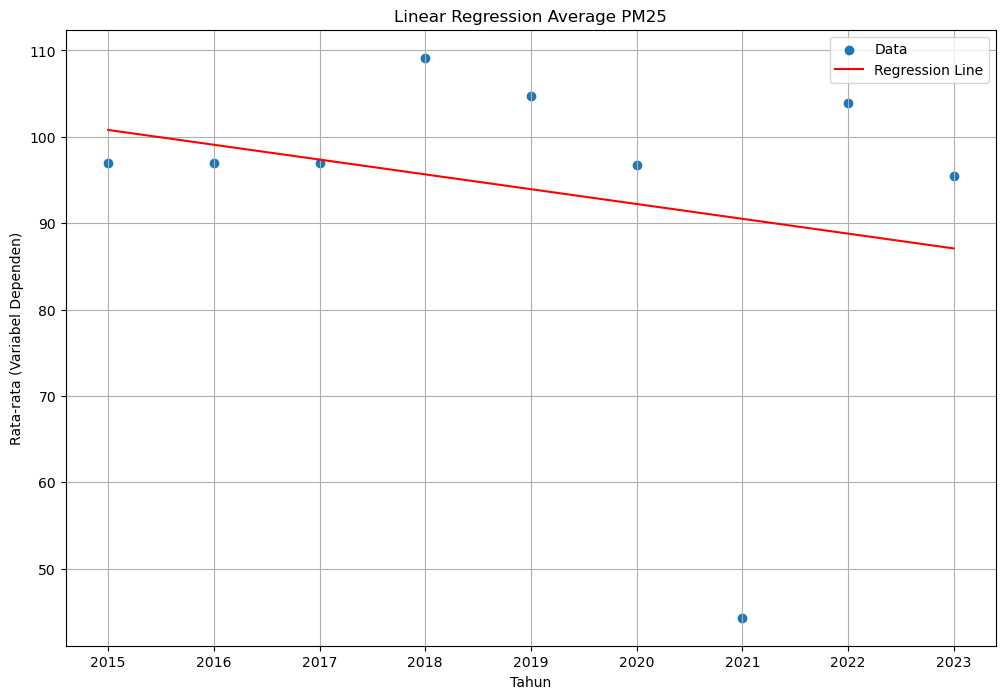

Regression Coefficient (Slope): [-1.71433939]
Intercept: [3555.18440316]


In [53]:
X = df_year_mean2['year'].values.reshape(-1, 1)
y = df_year_mean2['pm25'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata (Variabel Dependen)')
plt.title('Linear Regression Average PM25')
plt.legend()
plt.grid(True)
plt.show()

print('Regression Coefficient (Slope):', model.coef_[0])
print('Intercept:', model.intercept_)

###Menggunakan data perhari PM 2.5

In [54]:
df_fix.head(10)

,date,pm25,pm10,year,month,day
0,2023-08-01,102.0,55.0,2023,8,1
1,2023-08-02,130.0,65.0,2023,8,2
2,2023-08-03,135.0,68.0,2023,8,3
3,2023-08-04,136.0,60.0,2023,8,4
4,2023-08-05,125.0,91.0,2023,8,5
5,2023-08-06,144.0,81.0,2023,8,6
6,2023-08-07,159.0,69.0,2023,8,7
7,2023-08-08,157.0,66.0,2023,8,8
8,2023-08-09,151.0,67.0,2023,8,9
9,2023-08-10,156.0,67.0,2023,8,10


###Simple Linier Regression PM25

In [55]:
#Simple Linier Regression PM25.
# Membuat data menjadi array sesuai dengan kebutuhan model
x = df_fix.day.values.reshape(-1,1)
y = df_fix.pm25.values.reshape(-1,1)

#Model Linear Regression
model = LinearRegression().fit(x, y)

#Menghitung b0 dan b1
b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)

#Menampilkan hasil
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  90.789
slope (b1) :  0.06
 
y = 90.789 + 0.06 * x


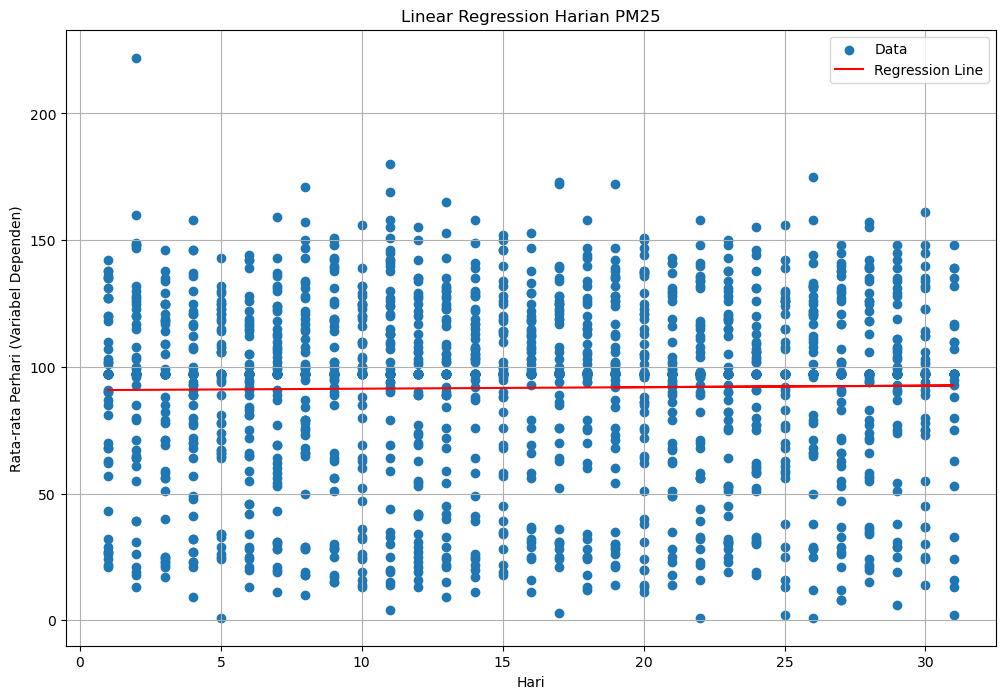

Regression Coefficient (Slope): [0.05962619]
Intercept: [90.788937]


In [56]:
X = df_fix['day'].values.reshape(-1, 1)
y = df_fix['pm25'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Perhari (Variabel Dependen)')
plt.title('Linear Regression Harian PM25')
plt.legend()
plt.grid(True)
plt.show()

print('Regression Coefficient (Slope):', model.coef_[0])
print('Intercept:', model.intercept_)

###REGRESI NYOBA

**MENGUBAH TYPE DATA MENJADI FLOAT**

In [57]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2026 non-null   datetime64[ns]
 1   pm25    2026 non-null   float64       
 2   pm10    2026 non-null   float64       
 3   year    2026 non-null   int64         
 4   month   2026 non-null   int64         
 5   day     2026 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 95.1 KB


In [58]:
df_fix['year'] = df_fix['year'].astype(float)
df_fix['month'] = df_fix['month'].astype(float)
df_fix['day'] = df_fix['day'].astype(float)

print(df_fix.dtypes)

date     datetime64[ns]
pm25            float64
pm10            float64
year            float64
month           float64
day             float64
dtype: object


In [59]:
df_fix.head()

,date,pm25,pm10,year,month,day
0,2023-08-01,102.0,55.0,2023.0,8.0,1.0
1,2023-08-02,130.0,65.0,2023.0,8.0,2.0
2,2023-08-03,135.0,68.0,2023.0,8.0,3.0
3,2023-08-04,136.0,60.0,2023.0,8.0,4.0
4,2023-08-05,125.0,91.0,2023.0,8.0,5.0


In [60]:
df_year_mean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    9 non-null      int64  
 1   pm25    9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 276.0 bytes


In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df_year_mean2['year'], df_year_mean2['pm25'], test_size=0.7)

In [63]:
modelregresi = LinearRegression()

modelregresi.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

print("Coefficient", modelregresi.coef_)
print("Intercept", modelregresi.intercept_)

Coefficient [[-8.78075397]]
Intercept [17790.21924603]


In [64]:
y1 = modelregresi.predict(np.array(x_test).reshape(-1,1))
y1

array([[26.75396825],
       [61.87698413],
       [70.6577381 ],
       [53.09623016],
       [88.21924603],
       [35.53472222],
       [79.43849206]])

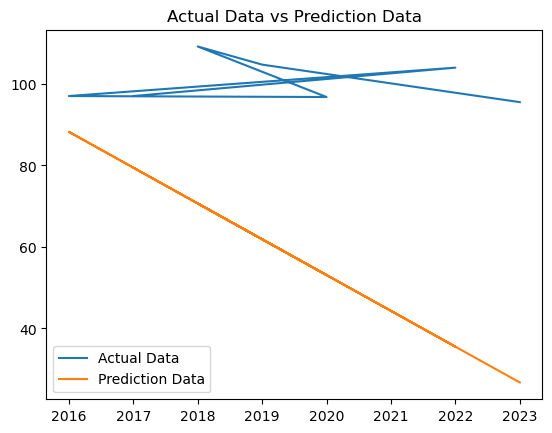

In [65]:
plt.title('Actual Data vs Prediction Data')
plt.plot(x_test,y_test,label="Actual Data")
plt.plot(x_test,y1,label='Prediction Data')
plt.legend()

In [66]:
# MAPE
nilaimape = mean_absolute_error(y_test, y1)*100
print(nilaimape)

4121.5106948543835


## Regresi Nyoba 1

In [67]:
#Menentukan Variabel independent(X) dan dependent(y)
x=df_fix[['day','month','year']]
y=df_fix[['pm25']]

#Membagi data menjadi Training dan Testing
#Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)#80 persen training

#Model Simple Linear Regression
model= LinearRegression()

#melatih model dengan data train
model.fit(x_train, y_train)

#membuat prediksi dengan data tes
predict =model.predict(x_test)
predict

array([[ 98.97508929],
       [ 87.33328913],
       [ 90.75064375],
       [ 89.73541873],
       [ 94.00401452],
       [ 84.00454243],
       [ 97.61583287],
       [ 88.82604953],
       [101.05445131],
       [101.17353911],
       [ 81.79286063],
       [ 92.03169251],
       [ 86.26112028],
       [ 89.78433071],
       [105.38519106],
       [ 90.7598598 ],
       [ 96.68401564],
       [104.46660581],
       [102.26414007],
       [ 92.8512696 ],
       [ 89.576635  ],
       [ 84.91391163],
       [ 81.89470052],
       [ 82.75515775],
       [ 87.45757705],
       [ 93.51925278],
       [ 92.03972436],
       [ 93.37771696],
       [ 85.29362304],
       [ 84.19900616],
       [ 87.38220111],
       [ 88.53376183],
       [ 84.0362065 ],
       [ 85.99128061],
       [ 85.3385191 ],
       [ 91.09065923],
       [ 89.79756269],
       [ 88.43712207],
       [ 83.95161452],
       [ 93.53248476],
       [ 81.77561273],
       [ 88.42790602],
       [ 84.84775175],
       [106

In [68]:
# Menambahkan kolom prediksi ke dalam DataFrame
df_fix['prediction'] = model.predict(x)

In [69]:
df_fix.head()

,date,pm25,pm10,year,month,day,prediction
0,2023-08-01,102.0,55.0,2023.0,8.0,1.0,86.270336
1,2023-08-02,130.0,65.0,2023.0,8.0,2.0,86.283568
2,2023-08-03,135.0,68.0,2023.0,8.0,3.0,86.296800
3,2023-08-04,136.0,60.0,2023.0,8.0,4.0,86.310032
4,2023-08-05,125.0,91.0,2023.0,8.0,5.0,86.323264


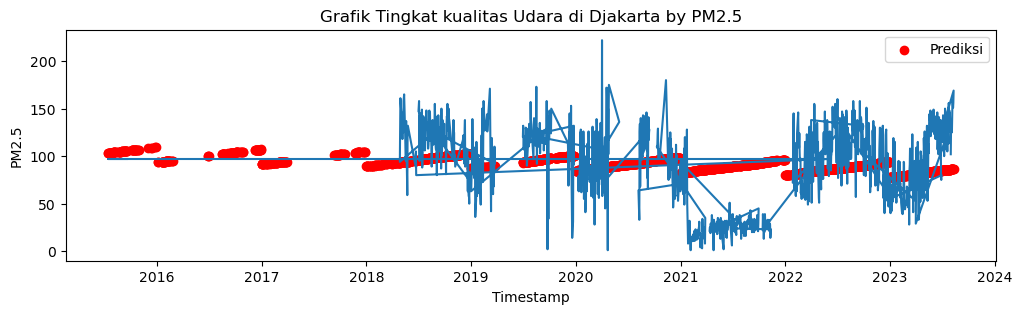

In [70]:
# Misalnya, kita asumsikan kolom 'timestamp' sudah ada
# Jika belum ada, gabungkan 'day', 'month', dan 'year' menjadi satu kolom waktu
df_fix['timestamp'] = pd.to_datetime(df_fix[['year', 'month', 'day']])

# Plot grafik PM2.5
plt.figure(figsize=(12, 3))
plt.title("Grafik Tingkat kualitas Udara di Djakarta by PM2.5")
plt.xlabel("Timestamp")
plt.ylabel("PM2.5")
plt.plot(df_fix['timestamp'], df_fix['pm25'])
plt.scatter(df_fix['timestamp'], df_fix['prediction'], label='Prediksi', color='red')  # line Regression
plt.legend()
plt.show()

##Regresi Nyoba 2


In [71]:
df_year_mean2

,year,pm25
0,2015,97.000000
1,2016,97.000000
2,2017,97.000000
3,2018,109.154412
4,2019,104.704545
5,2020,96.756983
6,2021,44.315476
7,2022,103.962644
8,2023,95.504545


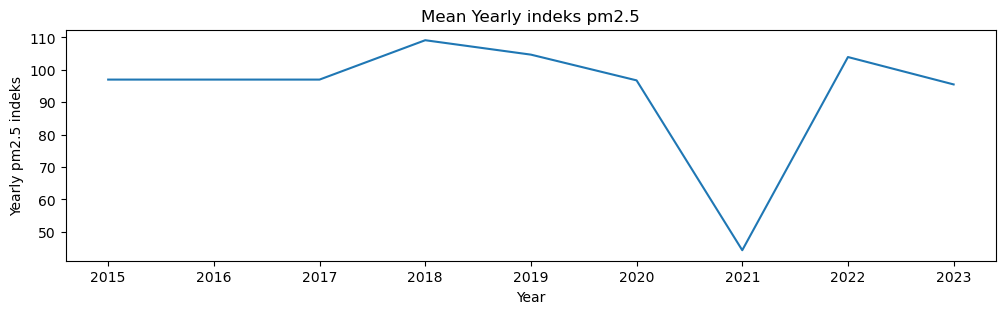

In [72]:
#Mean Grafik
plt.figure(figsize=(12,3))
plt.title("Mean Yearly indeks pm2.5")
plt.xlabel("Year")
plt.ylabel("Yearly pm2.5 indeks")
plt.plot(df_year_mean2['year'],df_year_mean2['pm25'])#plot Mean Chart
plt.show()#Display

###Menggunakan Plot

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

DATA SPLIT

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df_fix['day'], df_fix['pm25'], test_size=0.7)

MODEL REGRESI LINIER SEDERHANA

In [75]:
modelregresi = LinearRegression()

modelregresi.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

print("Coefficient", modelregresi.coef_)
print("Intercept", modelregresi.intercept_)

Coefficient [[0.11032498]]
Intercept [89.66747999]


MEMPREDIKSI NILAI Y

In [76]:
y1 = modelregresi.predict(np.array(x_test).reshape(-1,1))
y1

array([[90.32942985],
       [91.65332957],
       [91.10170469],
       ...,
       [91.54300459],
       [90.5500798 ],
       [90.32942985]])

VISUALISASI DATA

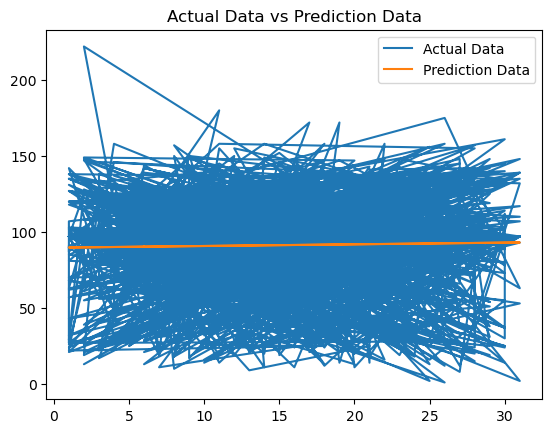

In [77]:
plt.title('Actual Data vs Prediction Data')
plt.plot(x_test,y_test,label="Actual Data")
plt.plot(x_test,y1,label='Prediction Data')
plt.legend()

In [78]:
# MAPE
nilaimape = mean_absolute_error(y_test, y1)*100
print(nilaimape)

2378.9176373013374


In [79]:
df_year_mean2

,year,pm25
0,2015,97.000000
1,2016,97.000000
2,2017,97.000000
3,2018,109.154412
4,2019,104.704545
5,2020,96.756983
6,2021,44.315476
7,2022,103.962644
8,2023,95.504545


In [80]:
x_train, x_test, y_train, y_test = train_test_split(df_year_mean2['year'], df_year_mean2['pm25'], test_size=0.7)

In [81]:
modelregresi = LinearRegression()

modelregresi.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

print("Coefficient", modelregresi.coef_)
print("Intercept", modelregresi.intercept_)

Coefficient [[1.16044061]]
Intercept [-2242.44827586]


In [82]:
y1 = modelregresi.predict(np.array(x_test).reshape(-1,1))
y1

array([[ 99.32088123],
       [102.80220307],
       [ 95.83955939],
       [100.48132184],
       [101.64176245],
       [105.12308429],
       [ 98.16044061]])

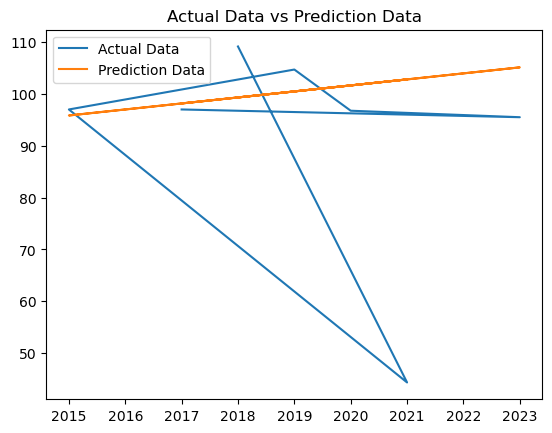

In [83]:
plt.title('Actual Data vs Prediction Data')
plt.plot(x_test,y_test,label="Actual Data")
plt.plot(x_test,y1,label='Prediction Data')
plt.legend()

In [84]:
# MAPE
nilaimape = mean_absolute_error(y_test, y1)*100
print(nilaimape)

1276.6811471907845


##Regresi Mean PM25

In [85]:
df_year_mean2

,year,pm25
0,2015,97.000000
1,2016,97.000000
2,2017,97.000000
3,2018,109.154412
4,2019,104.704545
5,2020,96.756983
6,2021,44.315476
7,2022,103.962644
8,2023,95.504545


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [87]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2026 non-null   datetime64[ns]
 1   pm25        2026 non-null   float64       
 2   pm10        2026 non-null   float64       
 3   year        2026 non-null   float64       
 4   month       2026 non-null   float64       
 5   day         2026 non-null   float64       
 6   prediction  2026 non-null   float64       
 7   timestamp   2026 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(6)
memory usage: 126.8 KB


In [88]:
# Pilih kolom yang relevan untuk fitur
features = ['pm25', 'year']

# Pisahkan feature dan target
X = df_split[features]
y_pm25 = df_split['pm25']

# Split data
X_train, X_test, y_train_pm25, y_test_pm25 = train_test_split(
    X, y_pm25, test_size=0.2, random_state=42)

numeric_features = ['year']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Define model untuk prediksi PM2.5
model_pm25 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Latih model
model_pm25.fit(X_train, y_train_pm25)

# Make predictions on the test set
y_pred_pm25 = model_pm25.predict(X_test)

# Evalusi model
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
r2_pm25 = r2_score(y_test_pm25, y_pred_pm25)

print(f'Mean Squared Error : {mse_pm25}')
print(f'R-squared : {r2_pm25}')

model_reported_disasters = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

Mean Squared Error : 597.9411887226629
R-squared : 0.4260756825958294


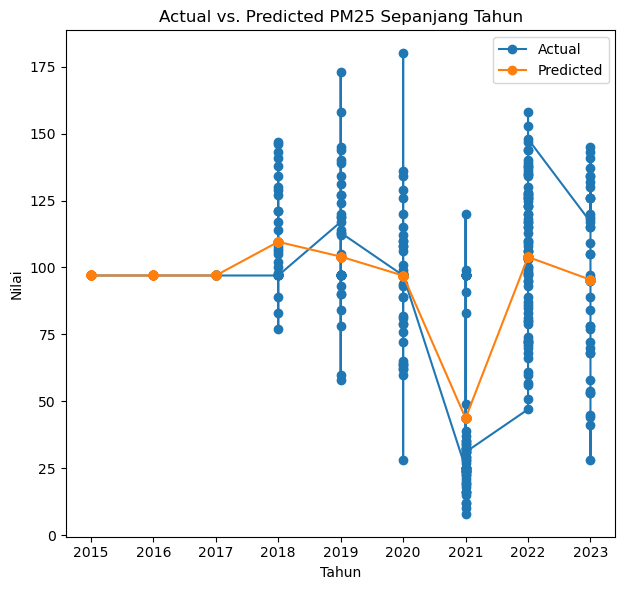

In [89]:
sorted_indices = X_test['year'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_pm25_sorted = y_test_pm25.iloc[sorted_indices]
y_pred_pm25_sorted = y_pred_pm25[sorted_indices]

# Line plot untuk Indeks PM2.5
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(X_test_sorted['year'], y_test_pm25_sorted, label='Actual', marker='o')
plt.plot(X_test_sorted['year'], y_pred_pm25_sorted, label='Predicted', marker='o')
plt.title('Actual vs. Predicted PM25 Sepanjang Tahun')
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend()


plt.tight_layout()
plt.show()

export_df = pd.DataFrame({
    'Year': X_test_sorted['year'],
    'Actual_PM25': y_test_pm25_sorted,
    'Predicted_PM25': y_pred_pm25_sorted
})

export_df.to_csv('predicted_vs_actual.csv', index=False)


##Forecasting 1

In [90]:
y_pred_pm25_sorted

array([ 97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        ,  97.        ,  97.        ,  97.        ,
        97.        , 109.57995211, 109.57995211, 109.57995211,
       109.57995211, 109.57995211, 109.57995211, 109.57

In [91]:
#Evaluation Regresion using MAPE
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test_pm25_sorted, y_pred_pm25_sorted) #dalam Persen
print("MAPE : ")
print(mape)

MAPE : 
17.633819358906965


In [92]:
X_test_sorted.head()

,pm25,year
1965,97.0,2015.0
2016,97.0,2015.0
2004,97.0,2015.0
1973,97.0,2015.0
2013,97.0,2015.0


In [93]:
data_forcast = pd.DataFrame({
    'year' : [2023,2024,2025,2026,2027,2028]
})
data_forcast

,year
0,2023
1,2024
2,2025
3,2026
4,2027
5,2028


In [94]:
model_pm25.predict(data_forcast[['year']])

array([95.40641681, 95.40641681, 95.40641681, 95.40641681, 95.40641681,
       95.40641681])

In [95]:
model_forcast=model_pm25.predict(data_forcast[['year']])

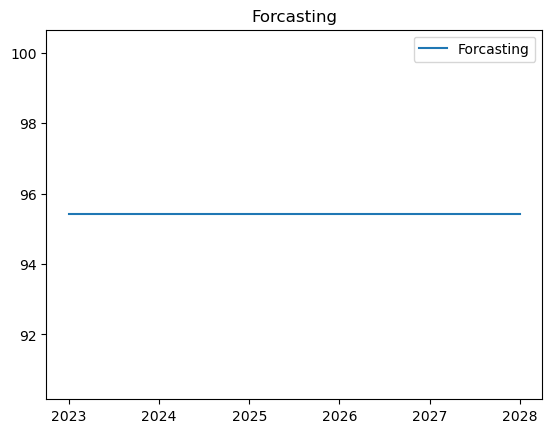

In [96]:
#Membuat Visualisasi untuk model yang telah di training
plt.plot(data_forcast['year'], model_forcast, label='Forcasting')
plt.legend()
plt.title('Forcasting')
plt.show()

##Forecasting 2

In [97]:
#Menentukan Variabel independent(X) dan dependent(y)
x=df_split[['year']]
y=df_split[['pm25']]

#Membagi data menjadi Training dan Testing
#Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

#Model Simple Linear Regression
model= LinearRegression()

#melatih model dengan data train
model.fit(x_train, y_train)

#membuat prediksi dengan data tes
predict =model.predict(x_test)

In [98]:
predict

array([[ 96.56377072],
       [ 91.39952766],
       [ 91.39952766],
       [ 88.81740613],
       [ 96.56377072],
       [ 88.81740613],
       [ 93.98164919],
       [ 86.2352846 ],
       [ 99.14589225],
       [ 99.14589225],
       [ 86.2352846 ],
       [ 86.2352846 ],
       [ 86.2352846 ],
       [ 86.2352846 ],
       [104.31013532],
       [ 88.81740613],
       [ 93.98164919],
       [104.31013532],
       [ 99.14589225],
       [ 99.14589225],
       [ 88.81740613],
       [ 91.39952766],
       [ 83.65316307],
       [ 88.81740613],
       [ 86.2352846 ],
       [ 86.2352846 ],
       [ 91.39952766],
       [ 88.81740613],
       [ 88.81740613],
       [ 86.2352846 ],
       [ 88.81740613],
       [ 93.98164919],
       [ 83.65316307],
       [ 91.39952766],
       [ 83.65316307],
       [ 88.81740613],
       [ 86.2352846 ],
       [ 91.39952766],
       [ 88.81740613],
       [ 86.2352846 ],
       [ 83.65316307],
       [ 93.98164919],
       [ 91.39952766],
       [101

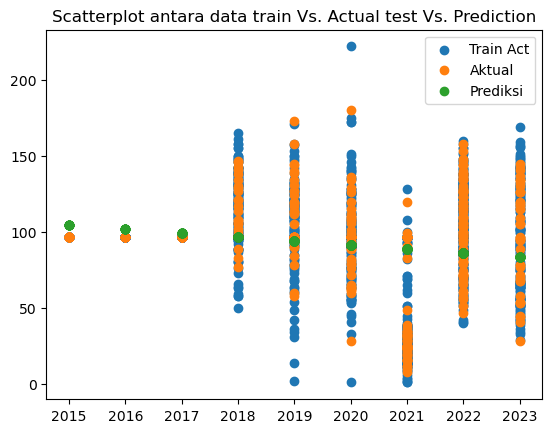

In [99]:
#Membuat Visualisasi untuk model yang telah di training
plt.scatter(x_train,y_train, label='Train Act')#80 persen data
plt.scatter(x_test,y_test, label='Aktual')#data test 20 persen dari total data tercatat
plt.scatter(x_test,predict, label='Prediksi')#line Regression
plt.legend()
plt.title('Scatterplot antara data train Vs. Actual test Vs. Prediction')
plt.show()

In [100]:
#Evaluation Regresion using MAPE
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, predict) #dalam Persen
print("MAPE : ")
print(mape)

MAPE : 
22.94548677379373


In [101]:
x_test.head()

,year
1284,2018.0
982,2020.0
1542,2020.0
593,2021.0
1292,2018.0


In [102]:
data_forcast = pd.DataFrame({
    'year' : [2023,2024,2025,2026,2027,2028]
})
data_forcast

,year
0,2023
1,2024
2,2025
3,2026
4,2027
5,2028


In [103]:
model.predict(data_forcast[['year']])

array([[83.65316307],
       [81.07104153],
       [78.48892   ],
       [75.90679847],
       [73.32467694],
       [70.74255541]])

In [104]:
model_forcast=model.predict(data_forcast[['year']])

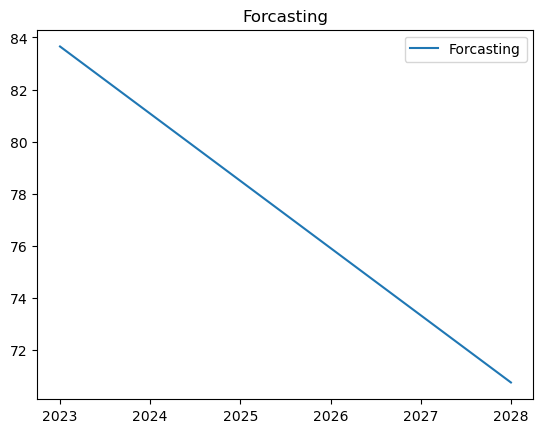

In [105]:
#Membuat Visualisasi untuk model yang telah di training
plt.plot(data_forcast['year'], model_forcast, label='Forcasting')
plt.legend()
plt.title('Forcasting')
plt.show()

Dari data yang telah diolah dengan dukungan kebijakan public

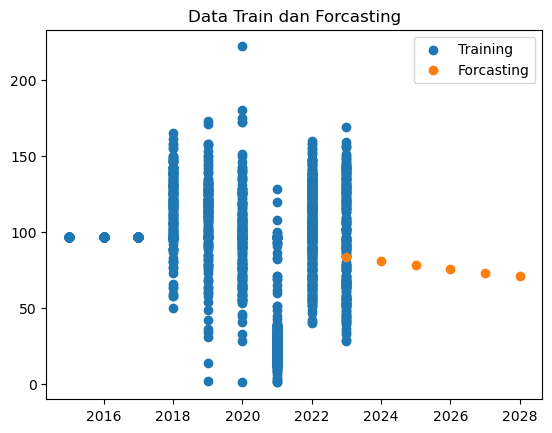

In [106]:
#Membuat Visualisasi untuk model yang telah di training
plt.scatter(x,y, label='Training')
plt.scatter(data_forcast['year'], model_forcast, label='Forcasting')
plt.legend()
plt.title('Data Train dan Forcasting')
plt.show()

dari grafik di atas menghasilkan data ramalan/prediksi yang dibuat dari model regresi. Prediksi data yang dihasilkan menunjukan tren menurun seiring berjalannya tahun dikarenakan koefisien regresi B1 pada model bernilai negatif (-).

##Forecasting 3 (df_mean_year2)

In [107]:
#Menentukan Variabel independent(X) dan dependent(y)
x=df_year_mean2[['year']]
y=df_year_mean2[['pm25']]

#Membagi data menjadi Training dan Testing
#Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

#Model Simple Linear Regression
model= LinearRegression()

#melatih model dengan data train
model.fit(x_train, y_train)

#membuat prediksi dengan data tes
predict =model.predict(x_test)

In [108]:
predict

array([[ 83.22311642],
       [100.90144418]])

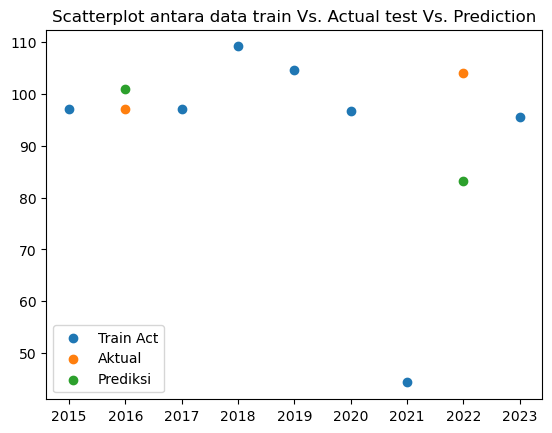

In [109]:
#Membuat Visualisasi untuk model yang telah di training
plt.scatter(x_train,y_train, label='Train Act')#80 persen data
plt.scatter(x_test,y_test, label='Aktual')#data test 20 persen dari total data tercatat
plt.scatter(x_test,predict, label='Prediksi')#line Regression
plt.legend()
plt.title('Scatterplot antara data train Vs. Actual test Vs. Prediction')
plt.show()

In [110]:
#Evaluation Regresion using MAPE
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, predict) #dalam Persen
print("MAPE : ")
print(mape)

MAPE : 
12.320485719462333


In [111]:
x_test.head()

,year
7,2022
1,2016


In [112]:
data_forcast = pd.DataFrame({
    'year' : [2023,2024,2025,2026,2027,2028]
})
data_forcast

,year
0,2023
1,2024
2,2025
3,2026
4,2027
5,2028


In [113]:
model.predict(data_forcast[['year']])

array([[80.27672846],
       [77.3303405 ],
       [74.38395254],
       [71.43756458],
       [68.49117662],
       [65.54478866]])

In [114]:
model_forcast=model.predict(data_forcast[['year']])

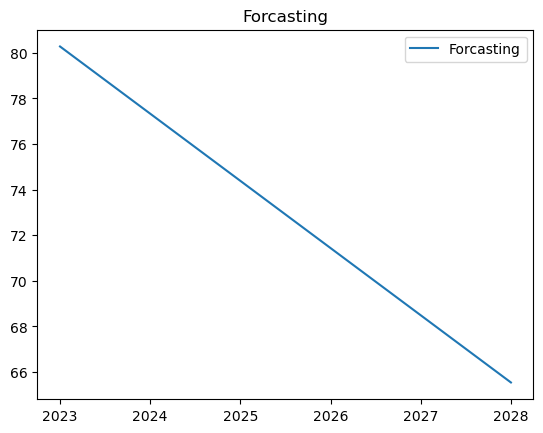

In [115]:
#Membuat Visualisasi untuk model yang telah di training
plt.plot(data_forcast['year'], model_forcast, label='Forcasting')
plt.legend()
plt.title('Forcasting')
plt.show()

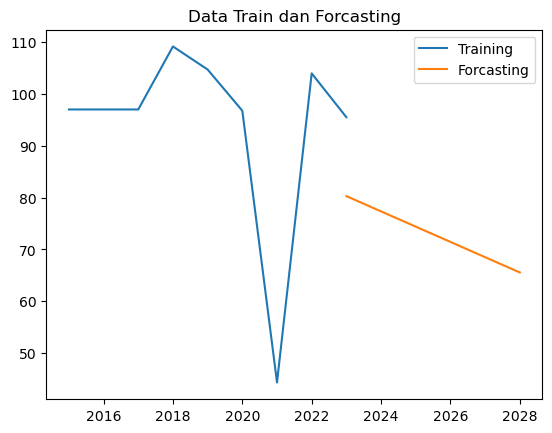

In [116]:
#Membuat Visualisasi untuk model yang telah di training
plt.plot(x,y, label='Training')
plt.plot(data_forcast['year'], model_forcast, label='Forcasting')
plt.legend()
plt.title('Data Train dan Forcasting')
plt.show()

## Unsupervised Learning - Clusstering Model

In [117]:
df_rth1=df2
df_rth1

,year,provinsi,kota/kabupaten,luas,rth,%rth(b/a)
0,2020,DKI Jakarta,Kota Adm. Jakarta Utara,140.00,337.36,2.41
1,2020,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.05,0.04
2,2020,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,0.12,1.33
3,2020,DKI Jakarta,Kota Adm. Jakarta Selatan,154.30,0.00,0.00
4,2020,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.83,1.73
5,2020,DKI Jakarta,Kota Adm. Jakarta Timur,182.70,350.68,1.92
6,2021,DKI Jakarta,Kota Adm. Jakarta Barat,124.40,0.02,0.02
7,2021,DKI Jakarta,Kab. Adm. Kep. Seribu,8.70,289.87,33.32
8,2021,DKI Jakarta,Kota Adm. Jakarta Selatan,141.27,175.30,1.24
9,2021,DKI Jakarta,Kota Adm. Jakarta Pusat,48.13,0.84,1.74


In [118]:
df_year_mean=df_rth1.groupby(['luas'])['rth'].mean().reset_index()

In [119]:
df_year_mean

,luas,rth
0,8.70,193.540000
1,48.13,0.836667
2,124.40,0.030000
3,140.00,164.673333
4,141.27,251.090000
5,154.30,0.000000
6,182.70,116.936667


In [120]:
#satu row mewakili satu tahun
from pandas.core.common import random_state
from sklearn.cluster import KMeans
x1 = df_year_mean[['luas','rth']]
df_rth = []
for n in range (1,11):
  model1 =KMeans(n_clusters=3, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state=100)
  model1.fit(x1)
  df_rth.append(model1.inertia_)
print(df_rth)

[16423.212562962963, 16423.212562962963, 16423.212562962963, 16423.212562962963, 16423.212562962963, 16423.212562962963, 16423.212562962963, 16423.212562962963, 16423.212562962963, 16423.212562962963]


Text(0, 0.5, 'RTH')

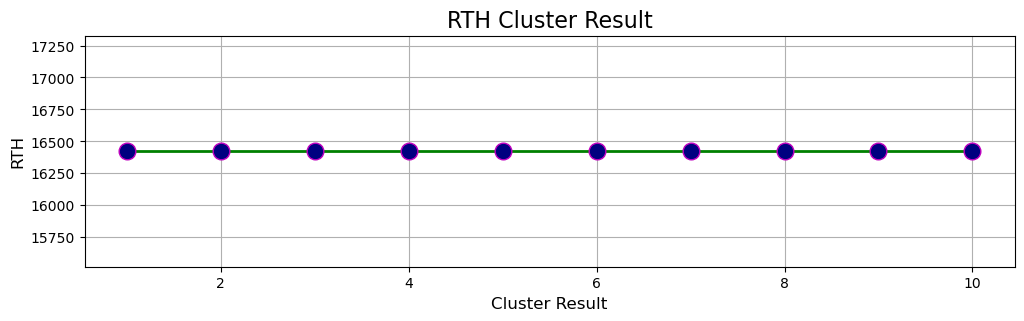

In [121]:
#Clustering by RTH
plt.figure(figsize=(12,3))
plt.plot(list(range(1,11)), df_rth, color='green', marker='o', linewidth=2, markersize=12, markerfacecolor='navy', markeredgecolor='m')
plt.title('RTH Cluster Result', fontsize = 16)
plt.grid(True)
plt.xlabel('Cluster Result', fontsize=12)
plt.ylabel('RTH', fontsize=12)

In [122]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) #Set jumlah cluster
kmeans.fit(x1.values)

KMeans(n_clusters=3, random_state=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


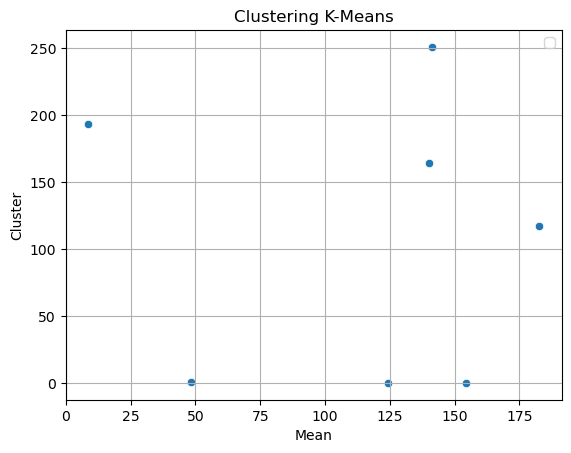

In [123]:
#Visualisasi hasil modelling
sns.scatterplot(data=x1, x='luas', y='rth')
plt.legend()
plt.xlabel('Mean')
plt.ylabel('Cluster')
plt.title('Clustering K-Means')
plt.grid(True)

In [124]:
x1.describe()

,luas,rth
count,7.000000,7.000000
mean,114.214286,103.872381
std,62.314014,104.697828
min,8.700000,0.000000
25%,86.265000,0.433333
50%,140.000000,116.936667
75%,147.785000,179.106667
max,182.700000,251.090000


In [125]:
#Menunjukkan centroid dari kmeans
kmeans.cluster_centers_

array([[154.65666667, 177.56666667],
       [108.94333333,   0.28888889],
       [  8.7       , 193.54      ]])

In [126]:
#Memasukkan hasil clustering ke data
x1['rth'] = kmeans.labels_

In [127]:
#Deskriptif stats dari modelling kmeans
x1['rth'] = kmeans.labels_
x1[['luas', 'rth']].groupby('rth').agg(['mean', 'median', 'std'])

luas                   
           mean  median        std
rth                               
0    154.656667  141.27  24.294539
1    108.943333  124.40  54.746677
2      8.700000    8.70        NaN

## Clusstering RTH berdasarkan Luas Wilayahnya.

In [128]:
df_rth1=df_rth1[df_rth1['year']>2021]

Cluster 1:
    year     rth    luas
14  2022  326.88  141.27


Cluster 2:
    year   rth    luas
12  2022  0.02  124.40
15  2022  0.84   48.13
16  2022  0.01  182.70
17  2022  0.83  140.00


Cluster 3:
    year     rth  luas
13  2022  290.63   8.7




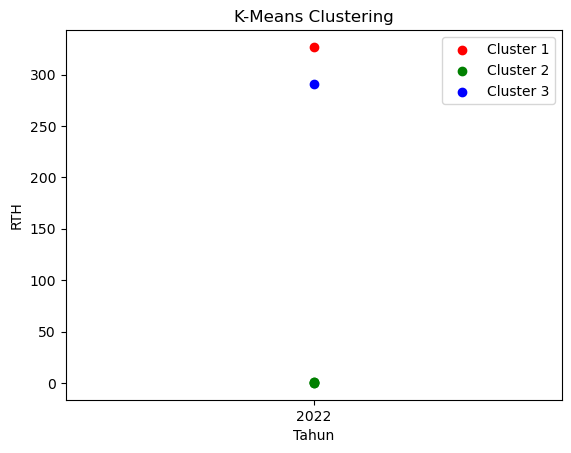

Data berhasil dieksport ke hasil_clustering.csv


In [129]:
warnings.filterwarnings("ignore")
oke = df_rth1[['rth','luas']]

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_rth1['cluster'] = kmeans.fit_predict(oke)

for cluster in range(n_clusters):
    cluster_data = df_rth1[df_rth1['cluster'] == cluster]
    print(f'Cluster {cluster + 1}:')
    print(cluster_data[['year', 'rth','luas']])
    print('\n')

warna = ['red', 'green', 'blue', 'purple', 'orange']
for cluster in range(n_clusters):
    cluster_data = df_rth1[df_rth1['cluster'] == cluster]
    plt.scatter(cluster_data['year'], cluster_data['rth'], c=warna[cluster], label=f'Cluster {cluster + 1}')

plt.xlabel('Tahun')
plt.ylabel('RTH')
plt.legend()
plt.title('K-Means Clustering')
plt.xticks([2022])
plt.show()
# Menyimpan DataFrame ke file CSV
csv_file = "hasil_clustering.csv"
df_rth1.to_csv(csv_file, index=False)
print(f"Data berhasil dieksport ke {csv_file}")

Dari grafik diatas data RTH terbagi menjadi 3 cluster :

Cluster 1 - 0.02 - 0.83

- Cluster 1 merupakan wilayah kabupaten atau kota dengan luas ruang terbuka hijau paling banyak berdasarkan luas wilayahnya sebanyak 4 kota/kabupaten.
- Cluster 1 memiliki nilai RTH yang rendah direntang 0.02 - 0.83

Adapun Kabupaten/Kota yang masuk pada cluster 1 ini adalah :

- Kota Adm. Jakarta Barat
- Kota Adm. Jakarta Pusat
- Kota Adm. Jakarta Timur
- Kota Adm. Jakarta Utara

cluster 2 - 326.88
- Cluster 2 merupakan wilayah kabupaten atau kota dengan luas ruang terbuka hijau hanya satu berdasarkan luas wilayahnya.
Meskipun demikian, hanya terdapat 1 kota tetapi luas RTH nya lebih banyak daripada cluster 1 dan 3.
- Kota Adm. Jakarta Selatan

cluster 3 - 290.63

- Cluster 3 merupakan wilayah kabupaten atau kota dengan luas ruang terbuka hijau hanya satu berdasarkan luas wilayahnya.
Meskipun demikian, hanya terdapat 1 kota yang masuk ke cluster ini. tetapi luas RTH nya lebih banyak daripada cluster 1 dan lebih rendah daricluster 2.
- Kab. Adm. Kep. Seribu

**TABEL RUJUKAN NILAI**

Tabel rujukan nilai polusi PM2.5 adalah tabel yang memuat standar atau batasan yang ditetapkan oleh badan atau lembaga lingkungan untuk konsentrasi partikel PM2.5 dalam udara yang dianggap aman atau diterima untuk kesehatan manusia. PM2.5 mengacu pada partikel halus berukuran 2,5 mikrometer atau lebih kecil yang terdapat di udara, dan dapat berasal dari berbagai sumber seperti polusi kendaraan, industri, pembakaran, atau debu. Tabel rujukan nilai polusi PM2.5 ini biasanya ditetapkan oleh Organisasi Kesehatan Dunia (WHO), atau badan lingkungan di negara tertentu. Nilai-nilai ini menunjukkan tingkat konsentrasi PM2.5 yang dianggap sebagai tingkat aman bagi kesehatan manusia.

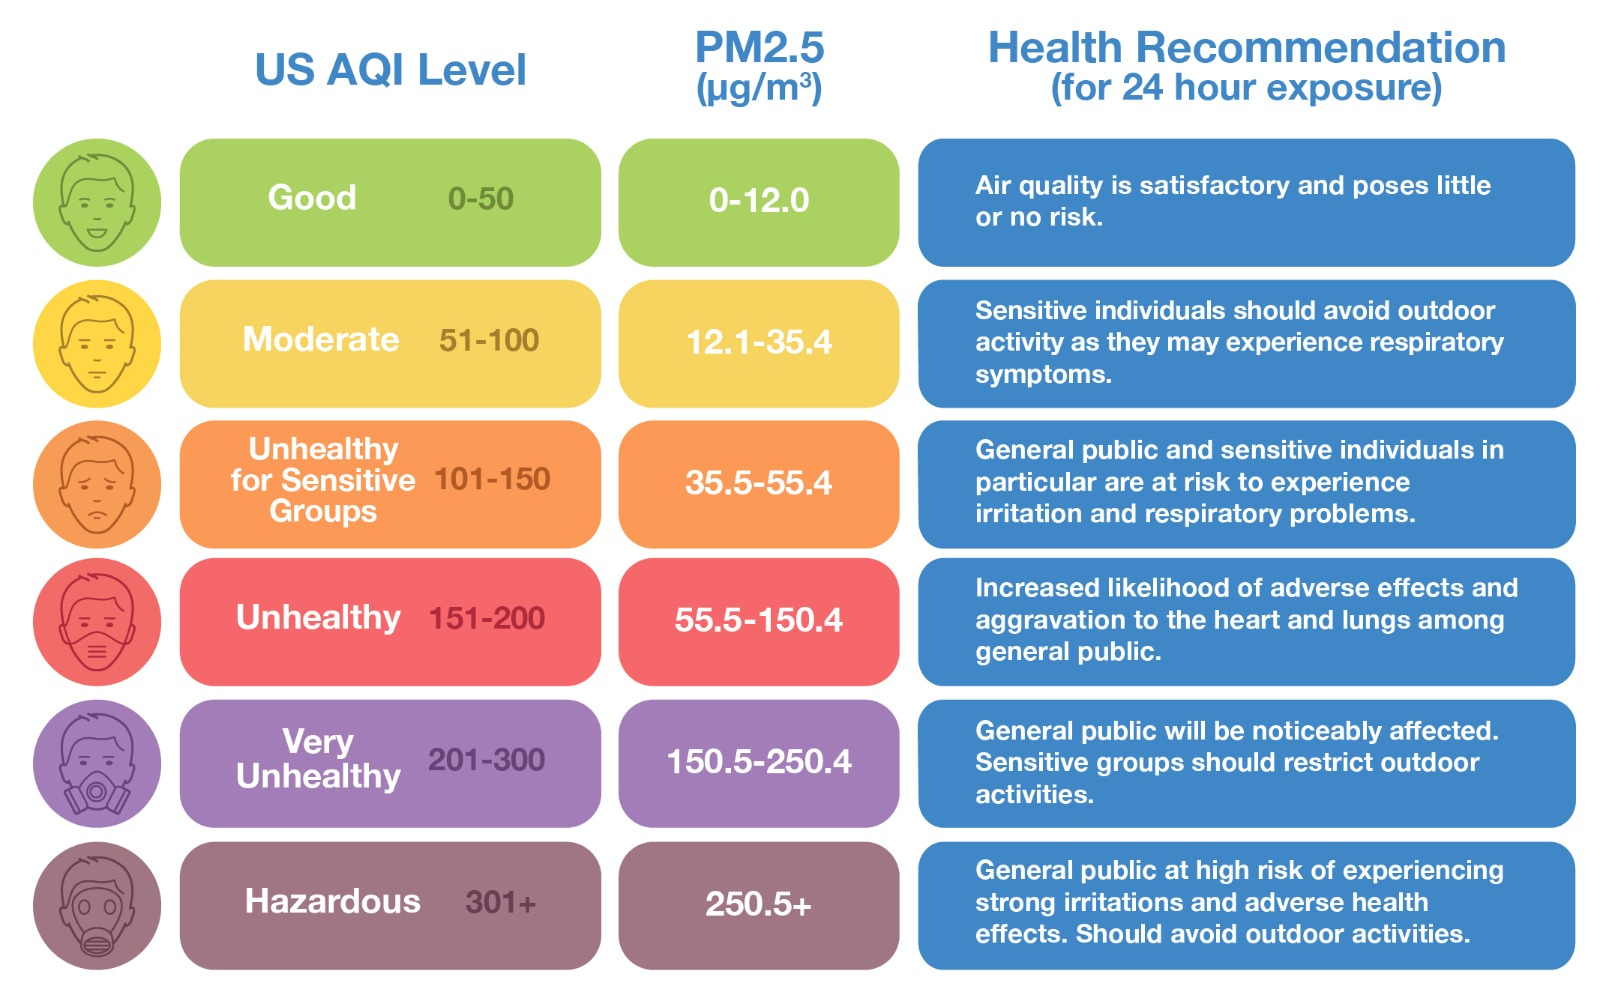

##Conclusion

Dari data indeks pm2.5 menunjukan angka 93.93  pada tahun 2015-2023 Yang menandakan nilainya itu di rentang tidak sehat untuk kesehatan manusia.

Terjadi penurunan rata - rata indeks pm2.5 di Jakarta pada tahun 2021. Diperkirakan penurunan terjadi karena pada tahun tersebut terjadi gelombang 2 pandemi COVID-19 yang menimbulkan kebijakan pemerintah seperti pembatasan aktivitas (LOCKDOWN) semakin diperketat.

Pembatasan aktivitas tersebut membuat pergerakan industri terhambat dan secara signifikan mengurangi emisi gas rumah kaca yang menyebabkan polusi Udara khususnya di Jakarta.

Lalu pada tahun 2022 terjadi peningkatan rata - rata indeks
pm2.5 di Jakarta secara signifikan dikarenakan pandemi COVID-19 berakhir dan pergerakan industri di Jakarta perlahan pulih.

Aktivitas masyarakat public dan individu yang sensitif terhadap polutan memiliki resiko lebih tinggi terhadap masalah iritasi dan pernapasannya.

Maka dari itu,  dari data diatas diperlukan adanya sebuah solusi produk digital mitigasi yang dapat menurunkan atau menahan laju kenaikan tingkat polusi di jakarta.

#LOOKER STUDIO

https://lookerstudio.google.com/reporting/348d393e-a5b5-4156-97c0-449c12c2699b